# Trabajo Práctico 2 : NLP + Árboles de Decisión

Fecha máxima de entrega: *Lunes 30 de mayo.*

---



In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## Parte 1 - Análisis de sentimientos

En esta primera parte se trabajará sobre un conjunto de datos de comercio electrónico de ropa de mujer que contiene reseñas escritas por los clientes. El objetivo es realizar un análisis de sentimientos para clasificar las reseñas como positivas o negativas.


### 1. Exploración, preprocesamiento y transformación de datos

a. Realizar Exploración de datos, describiendo las características de los mismos. 

b. Realizar las tareas de limpieza y transformación de datos que sean necesarias.

c. Construir la variable objetivo considerando al atributo Rating de la siguiente forma:
 * Negativo: 1-2-3
 * Positivo: 4-5


#### Exploración del dataset

In [80]:
data = pd.read_csv('/content/drive/MyDrive/Organización de datos/Material/Womens Clothing E-Commerce Reviews.csv')
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


Como hay una columna que duplica los índices la eliminamos.

In [81]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


Este dataset tiene 10 variables distintas, en donde cada fila presenta una crítica (positiva o negativa) a una prenda de ropa.

| _Variable_              	| _Tipo_                	| _Descripción_                                                   	|
|-------------------------	|-----------------------	|-----------------------------------------------------------------	|
| Clothing ID             	|                       	| ID de la prenda                                                 	|
| Age                     	| Cuantitativa continua 	| Edad de la persona que hace la crítica                          	|
| Title                   	| Cualitativa nominal   	| Título de la crítica                                            	|
| Review Text             	| Cualitativa           	| Texto de la crítica                                             	|
| Rating                  	| Cuantitativa discreta 	| Puntuación de 1 a 5                                             	|
| Recommended IND         	| Cualitativa binaria   	|                                                                 	|
| Positive Feedback Count 	| Cuantitativa discreta 	|                                                                 	|
| Division Name           	| Cualitativa nominal   	| División a la que pertenece la prenda                           	|
| Department Name         	| Cualitativa nominal   	| Departamento (dentro de la división) al que pertenece la prenda 	|
| Class Name              	| Cualitativa nominal   	| Clase (dentro del departamento) a la que pertenece la prenda    	|

Sobre las variables cualitativas, vemos para _Division Name_ y _Department Name_ la cantidad de registros sobre cada una.

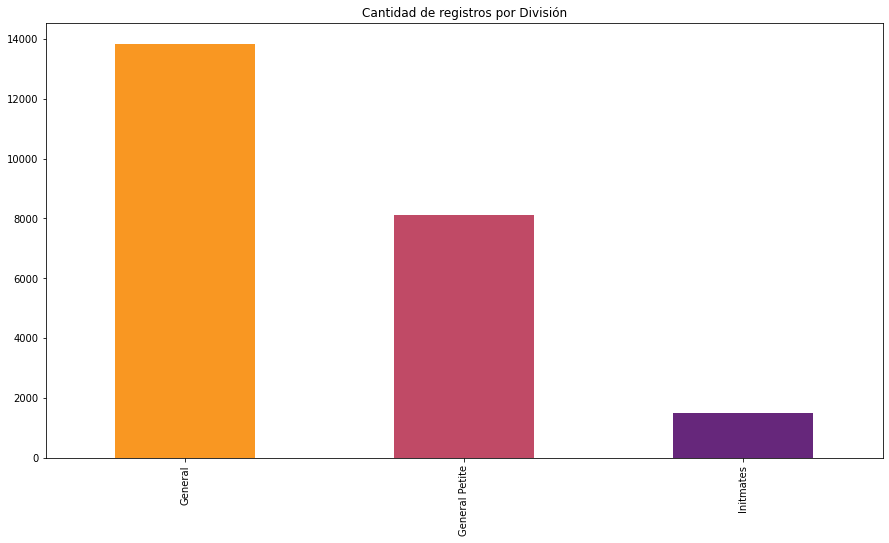

In [82]:
colores = sns.color_palette("inferno_r", 3)
data['Division Name'].value_counts().plot.bar(alpha=0.9,color=colores, figsize=(15,8), title='Cantidad de registros por División')
plt.show()

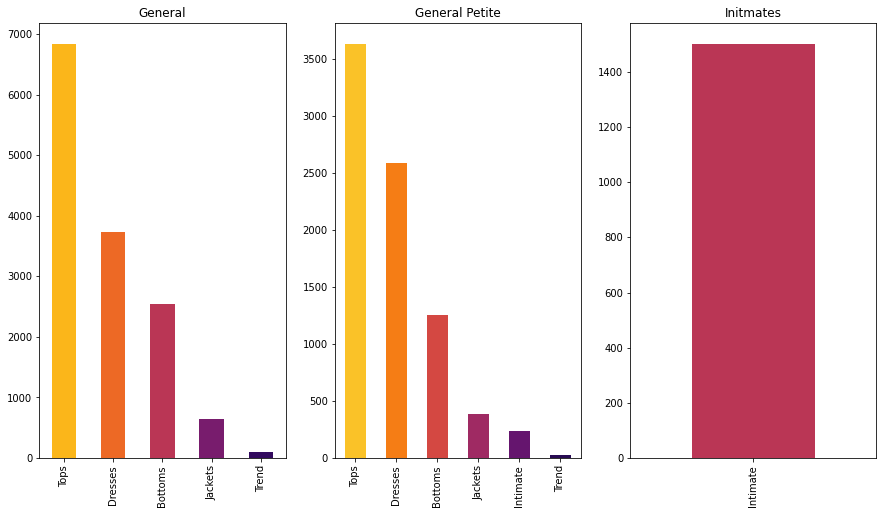

In [83]:
fig, axarr=plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
data[data['Division Name']=='General']['Department Name'].value_counts().plot.bar(title='General', color=sns.color_palette("inferno_r", 5), ax=axarr[0])
data[data['Division Name']=='General Petite']['Department Name'].value_counts().plot.bar(title='General Petite', color=sns.color_palette("inferno_r", 6), ax=axarr[1])
data[data['Division Name']=='Initmates']['Department Name'].value_counts().plot.bar(title='Initmates', color=sns.color_palette("inferno_r", 1), ax=axarr[2])
plt.show()

Respecto a _Class Name_ hacemos una suma de la cantidad de apariciones agrupado por departamento y división.

In [84]:
data.groupby(['Division Name', 'Department Name'])['Class Name'].value_counts()

Division Name   Department Name  Class Name    
General         Bottoms          Pants              835
                                 Jeans              787
                                 Skirts             601
                                 Shorts             317
                                 Casual bottoms       2
                Dresses          Dresses           3730
                Jackets          Jackets            397
                                 Outerwear          248
                Tops             Knits             3259
                                 Blouses           1993
                                 Sweaters           900
                                 Fine gauge         685
                Trend            Trend               96
General Petite  Bottoms          Pants              553
                                 Jeans              360
                                 Skirts             344
                Dresses          Dresses           2589


Para las variables cuantitavivas realizamos un histograma para la variable _Age_ y uno gráfico de barras para _Rating_.

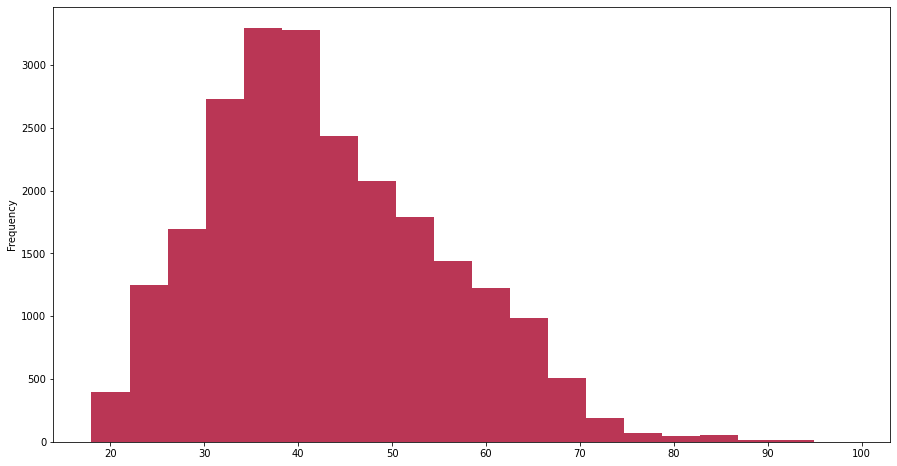

In [85]:
data['Age'].plot.hist(bins=20, figsize=(15,8), color=['#BA3655'])
plt.show()

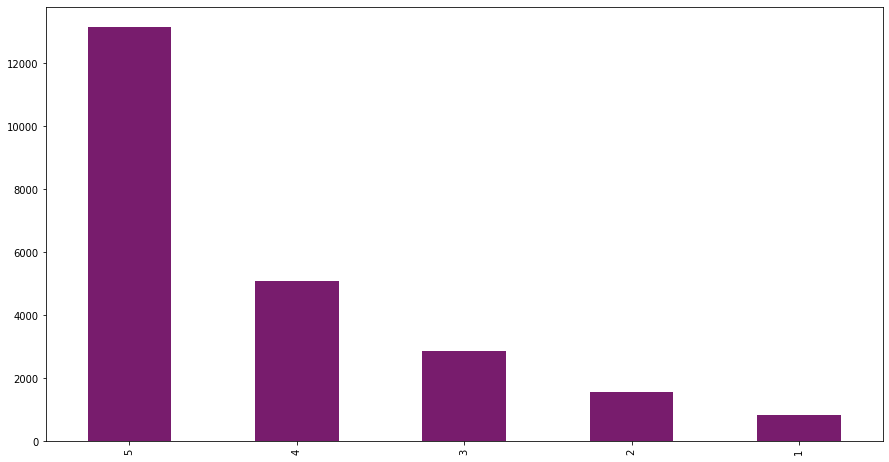

In [86]:
data['Rating'].value_counts().plot.bar(figsize=(15,8), color=['#781C6D'])
plt.show()

#### Limpieza y transformación

##### Comenzamos por las variables cuantitativas



Vemos la cantidad de valores nulos (NaN) en el dataset.

In [87]:
data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Para éste tipo de variable no hay datos nulos, revisamos que no haya datos nulos (distintos de NaN, como 0 por ejemplo) u outliers. Para eso vemos las medidas de resumen de las variables cuantitativas del dataset.

In [88]:
cuantitativas = data[['Age', 'Rating', 'Positive Feedback Count']]
cuantitativas.describe()

,Age,Rating,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,2.535936
std,12.279544,1.110031,5.702202
min,18.000000,1.000000,0.000000
25%,34.000000,4.000000,0.000000
50%,41.000000,5.000000,1.000000
75%,52.000000,5.000000,3.000000
max,99.000000,5.000000,122.000000


Por el lado de los valores mínimos no se ve nada raro, por el lado de los máximos sí. Para sacar los outliers vamos a realizar un análisis univariado calculando el z_score.

In [89]:
# z_score edad
data['z_Age']=st.zscore(data.Age)

# z_score modificado Rating
data['z_Rating']=st.zscore(data.Rating)

# z_score modificado Positive Feedback Count
data.rename(columns={'Positive Feedback Count':'Positive_Feedback_Count'}, inplace=True)
data['z_PFC']=st.zscore(data.Positive_Feedback_Count)

data[['Age', 'Rating', 'Positive_Feedback_Count', 'z_Age', 'z_Rating', 'z_PFC']]

,Age,Rating,Positive_Feedback_Count,z_Age,z_Rating,z_PFC
0,33,4,0,-0.830549,-0.176604,-0.444739
1,34,5,4,-0.749111,0.724291,0.256760
2,60,3,0,1.368277,-1.077499,-0.444739
3,50,5,0,0.553897,0.724291,-0.444739
4,47,5,6,0.309583,0.724291,0.607509
...,...,...,...,...,...,...
23481,34,5,0,-0.749111,0.724291,-0.444739
23482,48,3,0,0.391021,-1.077499,-0.444739
23483,31,3,1,-0.993425,-1.077499,-0.269364
23484,28,3,2,-1.237739,-1.077499,-0.093990


Verifico para cada variable que `abs(z_score) < 3`.



In [90]:
data[abs(data['z_Age']) > 3]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive_Feedback_Count,Division Name,Department Name,Class Name,z_Age,z_Rating,z_PFC
95,863,83,Casual elegance!,"Purchased this top online, and when i received...",5,1,14,General,Tops,Knits,3.241350,0.724291,2.010506
234,840,83,Pretty but runs large!,I ordered this top in my usual size and am exc...,5,1,0,General,Tops,Blouses,3.241350,0.724291,-0.444739
277,868,83,Sooooooooo cute!,"Love this top!\nit is a full/ swing top, but t...",5,1,1,General,Tops,Knits,3.241350,0.724291,-0.269364
659,252,93,Amazing suit!,"This is by far the cutest, most glamorous one ...",5,1,3,Initmates,Intimate,Swim,4.055730,0.724291,0.081385
846,1078,82,Great dress!!,"I am 5'4"" 140 pounds and ordered the 8 petite....",5,1,5,General Petite,Dresses,Dresses,3.159912,0.724291,0.432134
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22552,861,84,Awesome!,I saw this t on sale and ordered it. i had sec...,5,1,0,General,Tops,Knits,3.322788,0.724291,-0.444739
22716,1087,87,NaN,This dress fits great and is very warm for the...,4,1,0,General Petite,Dresses,Dresses,3.567102,-0.176604,-0.444739
22773,949,83,Scottish classic,Received this jacket yesterday...and it is lov...,5,1,0,General,Tops,Sweaters,3.241350,0.724291,-0.444739
23001,298,83,Beautiful twist on a classic,I found this top to be very beautiful and well...,5,1,3,General Petite,Intimate,Lounge,3.241350,0.724291,0.081385


In [91]:
data[abs(data['z_Rating']) > 3]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive_Feedback_Count,Division Name,Department Name,Class Name,z_Age,z_Rating,z_PFC


In [92]:
data[abs(data['z_PFC']) > 3]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive_Feedback_Count,Division Name,Department Name,Class Name,z_Age,z_Rating,z_PFC
53,862,39,Flattering and comfortable,Very soft and comfortable. the shirt has an un...,5,1,34,General,Tops,Knits,-0.341921,0.724291,5.517997
112,836,50,"Beautiful, stunning, cozy top!",I read the first review on this and ordered bo...,5,1,24,General,Tops,Blouses,0.553897,0.724291,3.764252
239,840,56,NaN,"I love the style of this top, and the longer l...",3,0,20,General,Tops,Blouses,1.042525,-1.077499,3.062753
320,836,41,NaN,I find that maeve shirts tend to run a little ...,5,1,23,General,Tops,Blouses,-0.179045,0.724291,3.588877
389,1104,38,Bad quality.,"I don't normally review my purchases, but i wa...",1,0,20,General,Dresses,Dresses,-0.423359,-2.879289,3.062753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23357,834,33,"Comfy, but not flattering to larger busts",I really liked this top-- the red gingham is a...,4,1,30,General,Tops,Blouses,-0.830549,-0.176604,4.816499
23427,854,42,Sheer shirt,What drew me to this shirt was the beautiful s...,2,0,65,General Petite,Tops,Knits,-0.097607,-1.978394,10.954610
23441,1104,63,Sweet surprise,Don't know why but i didn't have high expectat...,5,1,25,General Petite,Dresses,Dresses,1.612591,0.724291,3.939626
23467,1104,60,Super flattering!,"I worry when i have an elastic waist, or somet...",5,1,23,General Petite,Dresses,Dresses,1.368277,0.724291,3.588877


El dataset en total tiene 23486 registros, de los cuales 529 (como mucho, ya que puede haber algún repetido entre los outliers de _Age_ y _Positive Feedback Count_) son outliers según el cálculo del z_score, lo que representa sólo un 2.25% entonces los eliminamos.

In [93]:
#Eliminación de outlier por ínidce de fila
indice_outlier=data[abs(data['z_Age']) > 3].index
data.drop(indice_outlier, inplace=True)

indice_outlier=data[abs(data['z_PFC']) > 3].index
data.drop(indice_outlier, inplace=True)

Repetimos el proceso para ver si tras eliminar los outliers surgen otros nuevos.

In [94]:
# z_score edad
data['z_Age']=st.zscore(data.Age)

# z_score modificado Rating
data['z_Rating']=st.zscore(data.Rating)

# z_score modificado Positive Feedback Count
data.rename(columns={'Positive Feedback Count':'Positive_Feedback_Count'}, inplace=True)
data['z_PFC']=st.zscore(data.Positive_Feedback_Count)

In [95]:
data[abs(data['z_Age']) > 3]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive_Feedback_Count,Division Name,Department Name,Class Name,z_Age,z_Rating,z_PFC
628,1059,80,Please restock!!!,These sold out in my size 16 before i even kne...,5,1,6,General,Bottoms,Pants,3.083295,0.722438,1.211535
1199,720,80,Pretty but runs big!!,I loved this dress from the moment i saw it! i...,5,1,1,Initmates,Intimate,Lounge,3.083295,0.722438,-0.292695
3291,872,80,Huesca,"Love the contrast of fabrics, thick and thin. ...",5,1,1,General,Tops,Knits,3.083295,0.722438,-0.292695
3596,1077,80,Cute & flattering!,I bought this dress in the blue print and love...,5,1,0,General,Dresses,Dresses,3.083295,0.722438,-0.593541
3810,863,80,NaN,This top is perfect. i absolutely love this sw...,5,1,3,General Petite,Tops,Knits,3.083295,0.722438,0.308997
7147,1130,80,Very soft and swingy!,Coat is very soft and comfortable. runs large;...,5,1,3,General Petite,Jackets,Outerwear,3.083295,0.722438,0.308997
8109,1079,80,The sizing is off,"The dress is lovely, but the sizing is off. th...",4,1,5,General,Dresses,Dresses,3.083295,-0.180983,0.910689
10470,818,80,Completely sheer!,Please be awate that although this blouse is b...,3,0,0,General,Tops,Blouses,3.083295,-1.084405,-0.593541
11181,1025,80,Best. denim. ever.,"I tell everyone i know to try these jeans, tha...",5,1,3,General,Bottoms,Jeans,3.083295,0.722438,0.308997
22640,1094,80,Fantastic product,This arrived today and i am thrilled with it. ...,5,1,8,General Petite,Dresses,Dresses,3.083295,0.722438,1.813227


In [96]:
data[abs(data['z_Rating']) > 3]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive_Feedback_Count,Division Name,Department Name,Class Name,z_Age,z_Rating,z_PFC


In [97]:
data[abs(data['z_PFC']) > 3]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive_Feedback_Count,Division Name,Department Name,Class Name,z_Age,z_Rating,z_PFC
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,0.833569,-1.084405,3.618304
21,1080,55,I'm torn!,"I'm upset because for the price of the dress, ...",4,1,14,General,Dresses,Dresses,1.000216,-0.180983,3.618304
99,861,33,Pernette henley,I am in need of easy comfortable tops for ever...,3,0,17,General Petite,Tops,Knits,-0.832894,-1.084405,4.520842
134,845,65,You'll smile on a humid summer's day,This blouse is a perfect creation: perfect-wei...,5,1,12,General Petite,Tops,Blouses,1.833447,0.722438,3.016611
214,1020,67,Not as pictured!,The skirt that i received had very little blue...,1,0,17,General Petite,Bottoms,Skirts,2.000094,-2.891249,4.520842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23316,862,44,Chic and flattering,"For the last few seasons,bordeaux releases thi...",5,1,13,General Petite,Tops,Knits,0.083661,0.722438,3.317458
23339,1110,39,Romantic,"Soft and feminine, pretty pastel colors, very ...",5,1,15,General Petite,Dresses,Dresses,-0.332955,0.722438,3.919150
23347,1082,41,"Beautiful, versatile little white dress!",This dress is beautiful on! it is flowy and lo...,5,1,17,General,Dresses,Dresses,-0.166309,0.722438,4.520842
23382,1110,56,"Gorgeous, but...",Everything about this dress is beautiful excep...,4,0,17,General Petite,Dresses,Dresses,1.083539,-0.180983,4.520842


En este caso ya figuran muchos registros como outliers, por lo que no los tomamos como outliers como tal.

Finalmente, eliminamos las columnas agregadas y volvemos a ver las medidas de resumen.

In [98]:
data.drop(columns=['z_Age', 'z_Rating', 'z_PFC'], inplace=True)
cuantitativas = data[['Age', 'Rating', 'Positive_Feedback_Count']]
cuantitativas.describe()

,Age,Rating,Positive_Feedback_Count
count,22957.000000,22957.000000,22957.000000
mean,42.995949,4.200331,1.972906
std,12.001725,1.106927,3.324032
min,18.000000,1.000000,0.000000
25%,34.000000,4.000000,0.000000
50%,41.000000,5.000000,1.000000
75%,51.000000,5.000000,2.000000
max,80.000000,5.000000,19.000000


##### Seguimos por las cualitativas

Vemos la cantidad de valores nulos (NaN) en el dataset.

In [99]:
data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3738
Review Text                 844
Rating                        0
Recommended IND               0
Positive_Feedback_Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Empezamos por llenar la división, departamento y clase.

In [100]:
data.groupby(['Class Name'])['Department Name'].value_counts()

Class Name      Department Name
Blouses         Tops               3027
Casual bottoms  Bottoms               2
Chemises        Intimate              1
Dresses         Dresses            6110
Fine gauge      Tops               1078
Intimates       Intimate            154
Jackets         Jackets             690
Jeans           Bottoms            1134
Knits           Tops               4738
Layering        Intimate            143
Legwear         Intimate            164
Lounge          Intimate            677
Outerwear       Jackets             318
Pants           Bottoms            1370
Shorts          Bottoms             316
Skirts          Bottoms             937
Sleep           Intimate            225
Sweaters        Tops               1399
Swim            Intimate            345
Trend           Trend               115
Name: Department Name, dtype: int64

En base a esto hacemos un diccionario para llenar los departamentos, ya que no hay repetidos.

In [101]:
dict_dep = {'Blouses': 'Tops', 'Casual bottoms': 'Bottoms', 'Chemises': 'Intimate', 'Dresses': 'Dresses', 'Fine gauge': 'Tops', 'Intimates': 'Intimate', \
            'Jackets': 'Jackets', 'Jeans': 'Bottoms', 'Knits': 'Tops', 'Layering': 'Intimate', 'Legwear': 'Intimate', 'Lounge': 'Intimate', 'Outerwear': 'Jackets', \
            'Pants': 'Bottoms', 'Shorts': 'Bottoms', 'Skirts': 'Bottoms', 'Sleep': 'Intimate', 'Sweaters': 'Tops', 'Swim': 'Intimate', 'Trend': 'Trend'}

In [102]:
data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3738
Review Text                 844
Rating                        0
Recommended IND               0
Positive_Feedback_Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [103]:
unicos = set()
for v in data['Class Name'].values:
  if isinstance(v, str):
    unicos.add(v)

dfs = []
for u in unicos:
  df_u = data[data['Class Name'] == u].copy()
  df_u['Department Name'] = df_u['Department Name'].fillna(dict_dep[u])
  dfs.append(df_u)

aux = pd.concat(dfs)

In [112]:
# Hace algo raro, revisar (tendrían que eliminarse nans únicamente de Department Name, pero también lo hace de Division Name, Class Name, Title y Review text)

In [108]:
aux.isna().sum()

Clothing ID                   0
Age                           0
Title                      3737
Review Text                 843
Rating                        0
Recommended IND               0
Positive_Feedback_Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [111]:
data.isna().sum() # da todo 0 hay algo raro

Clothing ID                   0
Age                           0
Title                      3738
Review Text                 844
Rating                        0
Recommended IND               0
Positive_Feedback_Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### 2. Generación y evaluación de modelos 

a. Dividir el conjunto de datos en un 70-30, en donde el 70% de los datos se utilizarán para
entrenar el modelo y el 30% restante para validarlo. 

b. Entrenar los siguientes algoritmos tal que a partir del texto en el campo “Review Text”, pueda clasificar correctamente la crítica como positiva o negativa.
 * Naive Bayes
 * Regresión logística
 * Árboles de decisión
 * Random Forest  

c. Evaluar todos los clasificadores utilizando las métricas, precisión, recall y F1-Score.

d. Seleccionar el modelo con mejor desempeño y evaluarlo utilizando las 5 clases del
atributo Rating en lugar de la clase binaria

### 3. Conclusiones
Extraer conclusiones a partir de los análisis realizados en los puntos anteriores, y
justificar cada conclusión.